# LSTM Example

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

sns.set(rc={'figure.figsize':(15,8)})

## Data preprocessing

In [2]:
data = pd.read_csv('AirPassengers.csv',parse_dates=['Month'])

In [3]:
data.head()

Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121

In [4]:
data.shape

(144, 2)

In [5]:
data['Month'].min()

Timestamp('1949-01-01 00:00:00')

In [6]:
data['Month'].max()

Timestamp('1960-12-01 00:00:00')

## EDA

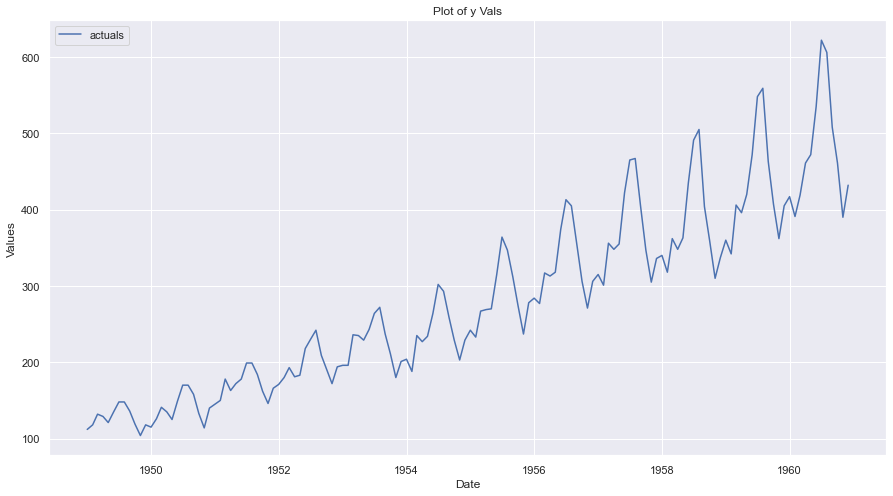

In [7]:
f = Forecaster(y=data['#Passengers'],current_dates=data['Month'])
f.plot()

In [8]:
f

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    CILevel=0.95
    BootstrapSamples=100
)

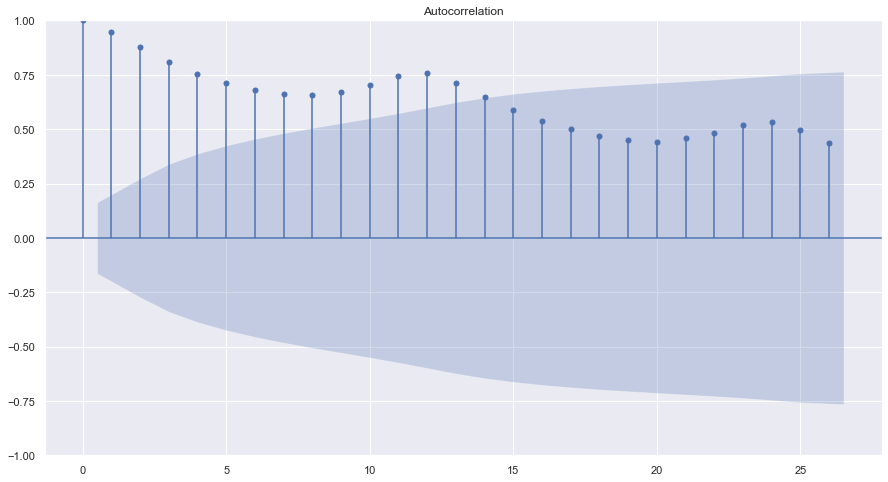

In [9]:
f.plot_acf(lags=26)
plt.show()

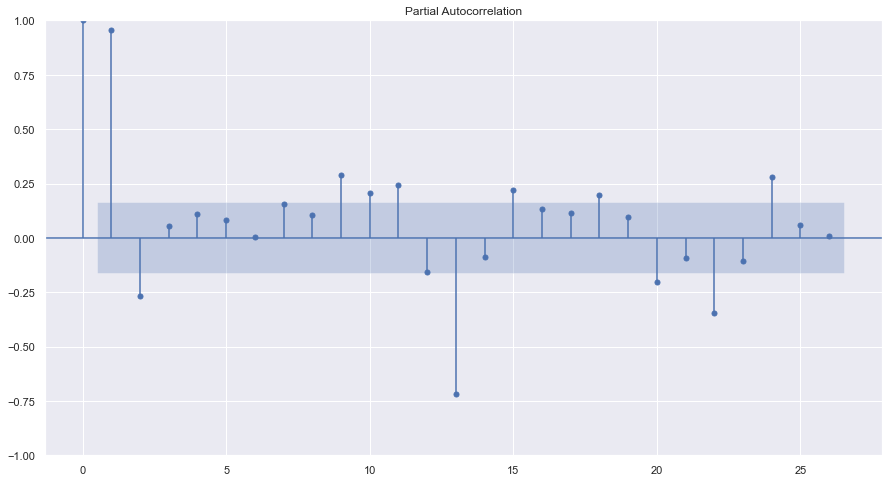

In [10]:
f.plot_pacf(lags=26)
plt.show()

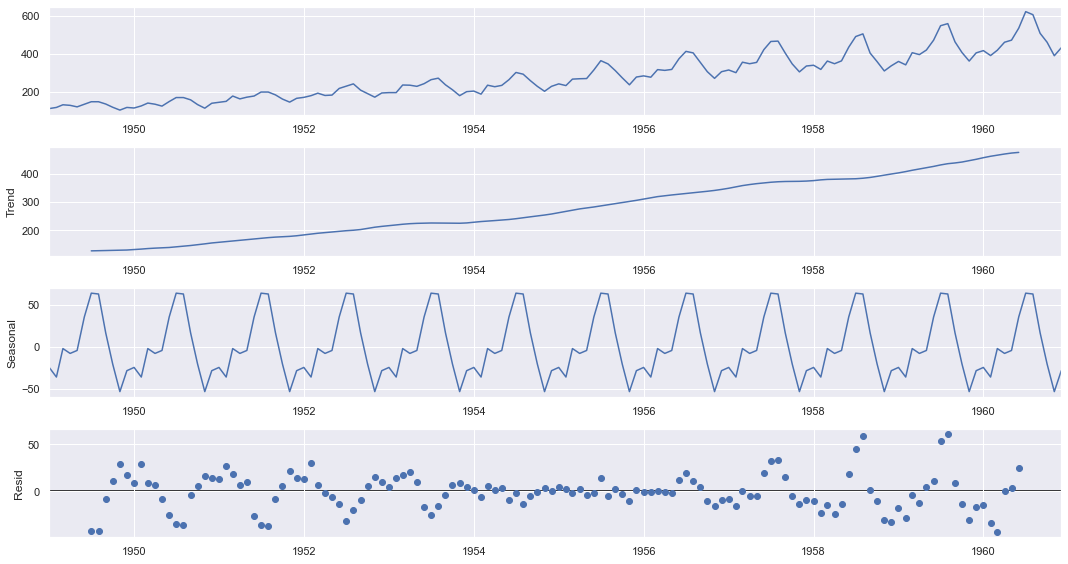

In [11]:
f.seasonal_decompose().plot()
plt.show()

In [12]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

0.8153688792060569
0.9918802434376411


## LSTM Model

In [13]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

### Attempt 1

In [14]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

5/5 [==============================] - 1s 2ms/step - loss: 0.3293


### Attempt 2

In [15]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

4/4 [==============================] - 1s 9ms/step - loss: 0.3630


### Attempt 3

In [16]:
f.manual_forecast(call_me='lstm_24lags_5epochs',lags=24,epochs=5,validation_split=.2,shuffle=True)
f.plot_test_set(ci=True)

Epoch 1/5
3/3 [==============================] - 2s 191ms/step - loss: 0.4728 - val_loss: 0.1959
Epoch 2/5
3/3 [==============================] - 0s 16ms/step - loss: 0.4631 - val_loss: 0.1895
Epoch 3/5
3/3 [==============================] - 0s 15ms/step - loss: 0.4533 - val_loss: 0.1830
Epoch 4/5
3/3 [==============================] - 0s 14ms/step - loss: 0.4432 - val_loss: 0.1765
Epoch 5/5
3/3 [==============================] - 0s 17ms/step - loss: 0.4331 - val_loss: 0.1698
Epoch 1/5
3/3 [==============================] - 2s 174ms/step - loss: 0.4601 - val_loss: 0.1779
Epoch 2/5
3/3 [==============================] - 0s 15ms/step - loss: 0.4520 - val_loss: 0.1725
Epoch 3/5
3/3 [==============================] - 0s 17ms/step - loss: 0.4442 - val_loss: 0.1672
Epoch 4/5
3/3 [==============================] - 0s 17ms/step - loss: 0.4362 - val_loss: 0.1619
Epoch 5/5
3/3 [==============================] - 0s 20ms/step - loss: 0.4285 - val_loss: 0.1566


### Attempt 4

Epoch 1/25
3/3 [==============================] - 5s 429ms/step - loss: 0.4558 - val_loss: 0.1840
Epoch 2/25
3/3 [==============================] - 0s 32ms/step - loss: 0.4332 - val_loss: 0.1693
Epoch 3/25
3/3 [==============================] - 0s 30ms/step - loss: 0.4066 - val_loss: 0.1506
Epoch 4/25
3/3 [==============================] - 0s 36ms/step - loss: 0.3715 - val_loss: 0.1265
Epoch 5/25
3/3 [==============================] - 0s 34ms/step - loss: 0.3267 - val_loss: 0.1022
Epoch 6/25
3/3 [==============================] - 0s 36ms/step - loss: 0.2773 - val_loss: 0.0927
Epoch 7/25
3/3 [==============================] - 0s 36ms/step - loss: 0.2318 - val_loss: 0.1061
Epoch 8/25
3/3 [==============================] - 0s 36ms/step - loss: 0.2014 - val_loss: 0.1344
Epoch 9/25
3/3 [==============================] - 0s 34ms/step - loss: 0.1833 - val_loss: 0.1470
Epoch 10/25
3/3 [==============================] - 0s 38ms/step - loss: 0.1687 - val_loss: 0.1388
Epoch 11/25
3/3 [===========

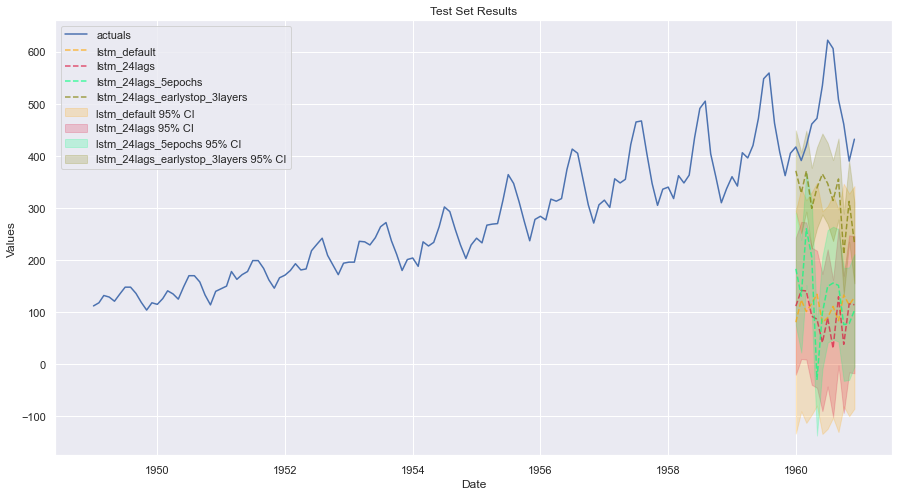

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

### Attempt 5

Epoch 1/15
3/3 [==============================] - 7s 729ms/step - loss: 0.4853 - val_loss: 0.2078
Epoch 2/15
3/3 [==============================] - 0s 98ms/step - loss: 0.3940 - val_loss: 0.0994
Epoch 3/15
3/3 [==============================] - 0s 117ms/step - loss: 0.2115 - val_loss: 0.1568
Epoch 4/15
3/3 [==============================] - 0s 117ms/step - loss: 0.1480 - val_loss: 0.0611
Epoch 5/15
3/3 [==============================] - 0s 118ms/step - loss: 0.1177 - val_loss: 0.0646
Epoch 6/15
3/3 [==============================] - 0s 114ms/step - loss: 0.1161 - val_loss: 0.0677
Epoch 7/15
3/3 [==============================] - 0s 114ms/step - loss: 0.1049 - val_loss: 0.0551
Epoch 8/15
3/3 [==============================] - 0s 112ms/step - loss: 0.0993 - val_loss: 0.0548
Epoch 9/15
3/3 [==============================] - 0s 115ms/step - loss: 0.0957 - val_loss: 0.0562
Epoch 10/15
3/3 [==============================] - 0s 111ms/step - loss: 0.0967 - val_loss: 0.0561
Epoch 11/15
3/3 [===

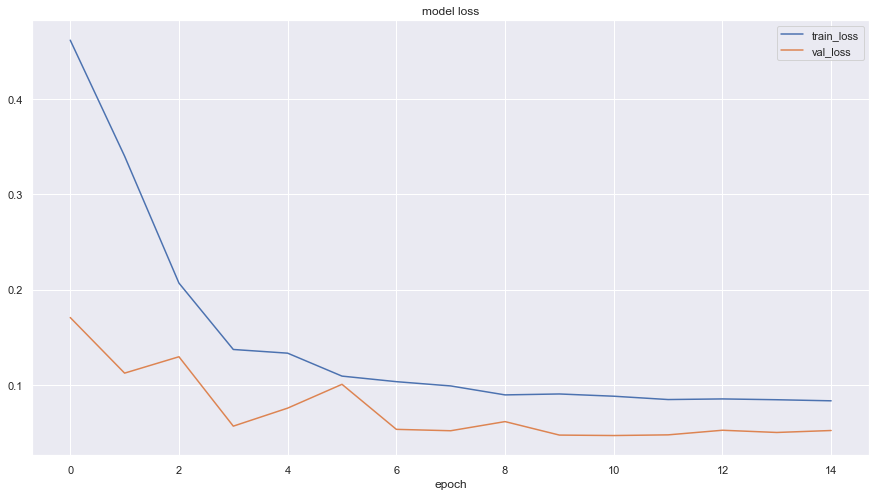

In [22]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

## MLR Modeling

In [23]:
f.set_estimator('mlr')
f.add_ar_terms(24)
f.add_seasonal_regressors('month','quarter',dummy=True)
f.add_seasonal_regressors('year')
f.add_time_trend()
f.diff()

In [24]:
f.manual_forecast()
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2')

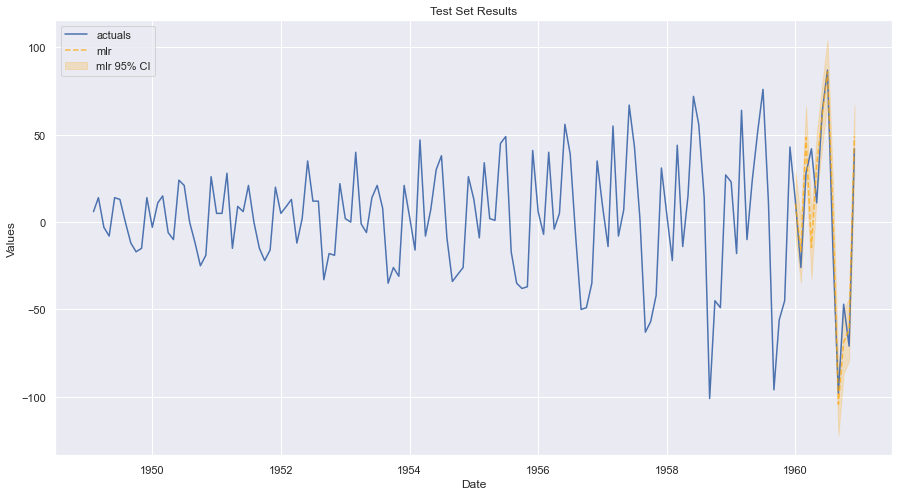

In [32]:
f.plot_test_set(models='mlr',ci=True)

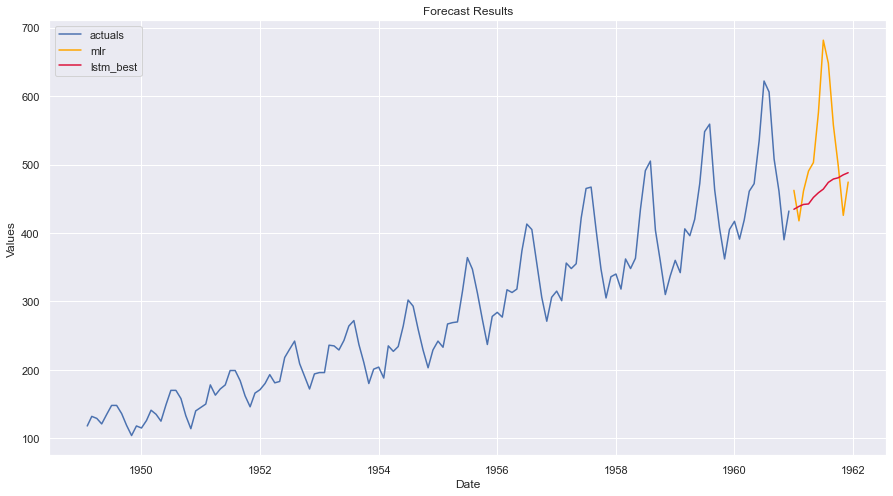

In [45]:
f.plot(order_by='LevelTestSetMAPE',models='top_2')

## Benchmarking

In [25]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname','LevelTestSetMAPE','LevelTestSetRMSE','LevelTestSetR2','best_model']
]

ModelNickname  LevelTestSetMAPE  LevelTestSetRMSE  \
0                            mlr          0.023420         13.932124   
1                      lstm_best          0.113758         83.110945   
2  lstm_24lags_earlystop_3layers          0.313254        176.288432   
3            lstm_24lags_5epochs          0.719614        360.578667   
4                   lstm_default          0.766014        377.468538   
5                    lstm_24lags          0.789948        395.179590   

   LevelTestSetR2  best_model  
0        0.964960        True  
1       -0.246947       False  
2       -4.610212       False  
3      -22.471004       False  
4      -24.721313       False  
5      -27.191658       False

## Export Results

In [35]:
f.export_forecasts_with_cis('mlr')

DATE  UpperForecast    Forecast  LowerForecast ModelNickname
0  1961-01-01      48.200665   30.246319      12.291972           mlr
1  1961-02-01     -26.568385  -44.522731     -62.477077           mlr
2  1961-03-01      61.632285   43.677939      25.723593           mlr
3  1961-04-01      47.017771   29.063425      11.109079           mlr
4  1961-05-01      30.351736   12.397390      -5.556956           mlr
5  1961-06-01      91.214331   73.259985      55.305639           mlr
6  1961-07-01     123.495172  105.540825      87.586479           mlr
7  1961-08-01     -15.632798  -33.587144     -51.541490           mlr
8  1961-09-01     -72.577979  -90.532325    -108.486671           mlr
9  1961-10-01     -41.418451  -59.372797     -77.327144           mlr
10 1961-11-01     -54.486169  -72.440515     -90.394862           mlr
11 1961-12-01      66.525041   48.570694      30.616348           mlr

In [36]:
f.export_test_set_preds_with_cis('mlr')

DATE  UpperPreds       Preds  Actuals  LowerPreds ModelNickname
0  1960-01-01   28.556057   10.601711     12.0   -7.352636           mlr
1  1960-02-01    1.231249  -16.723097    -26.0  -34.677443           mlr
2  1960-03-01   66.376317   48.421971     28.0   30.467624           mlr
3  1960-04-01    3.388136  -14.566210     42.0  -32.520557           mlr
4  1960-05-01   50.838291   32.883945     11.0   14.929599           mlr
5  1960-06-01   78.852376   60.898029     63.0   42.943683           mlr
6  1960-07-01  104.158996   86.204650     87.0   68.250303           mlr
7  1960-08-01   23.959542    6.005196    -16.0  -11.949150           mlr
8  1960-09-01  -86.291126 -104.245472    -98.0 -122.199818           mlr
9  1960-10-01  -50.666725  -68.621071    -47.0  -86.575417           mlr
10 1960-11-01  -43.483259  -61.437606    -71.0  -79.391952           mlr
11 1960-12-01   67.033891   49.079545     42.0   31.125199           mlr

### Export Feature Info

In [37]:
f.save_feature_importance()
f.export_feature_importance('mlr')

weight       std
feature                      
AR1        0.353654  0.040011
AR12       0.212440  0.035555
AR4        0.195865  0.031963
AR10       0.172288  0.016409
AR21       0.144722  0.014716
AR13       0.110973  0.008805
AR2        0.103469  0.011157
AR18       0.095767  0.006091
AR20       0.080367  0.014563
AR11       0.078889  0.015673
AR3        0.072955  0.005806
AR7        0.064859  0.010104
AR8        0.061835  0.005144
AR22       0.059363  0.004871
month_9    0.047820  0.004102
AR9        0.043480  0.009598
AR14       0.032727  0.003600
AR24       0.026527  0.006712
AR17       0.024978  0.004891
AR23       0.020637  0.005097
AR19       0.018921  0.002676
month_7    0.015187  0.002255
month_2    0.010931  0.001847
AR5        0.009453  0.004327
month_10   0.006637  0.001670
month_8    0.006208  0.003219
AR16       0.005731  0.001594
month_11   0.003629  0.001834
month_3    0.003575  0.001255
AR6        0.003097  0.000892
year       0.001463  0.001607
month_1    0.001226  0.000950
month      0.000897  0.000571
AR15       0.000765  0.000396
month_12   0.000628  0.000638
t          0.000578  0.000714
month_6    0.000424  0.000652
quarter_2  0.000368  0.000750
quarter_1  0.000236  0.000311
quarter_4  0.000116  0.000379
month_4    0.000106  0.000160
quarter_3  0.000030  0.000179
quarter   -0.000020  0.000130
month_5   -0.000115  0.000365